<a href="https://colab.research.google.com/github/FutureOfTed/AI-class/blob/main/Week4/wine_quality_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1) 데이터 준비

# 'winequality-red.csv' 파일 불러오기
red_wine_df = pd.read_csv('/content/drive/MyDrive/data/winequality-red.csv', sep=';')

# 'winequality-white.csv' 파일 불러오기
white_wine_df = pd.read_csv('/content/drive/MyDrive/data/winequality-white.csv', sep=';')

In [3]:
red_wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
white_wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [5]:
# 두 데이터프레임을 합치기
wine = pd.concat([red_wine_df, white_wine_df], ignore_index=True)

In [6]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [8]:
# 열 이름의 공백을 밑줄로 변경하여 사용하기 쉽게 만듦
wine.columns = wine.columns.str.replace(' ', '_')

In [9]:
# 결측치 확인
wine.isnull().sum()

,0
fixed_acidity,0
volatile_acidity,0
citric_acid,0
residual_sugar,0
chlorides,0
free_sulfur_dioxide,0
total_sulfur_dioxide,0
density,0
pH,0
sulphates,0


In [10]:
wine.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [12]:
# 모든 레이블을 숫자로 변형

from sklearn.preprocessing import LabelEncoder

# label_encoders라는 빈 딕셔너리 먼저 선언
# 각 컬럼별로 LabelEncoder 객체를 저장하는 용도
label_encoders = {}

# df.columns에 있는 각 컬럼에 대해 반복문을 돌면서
for column in wine.columns:

    # 해당 컬럼 이름을 키(key)로 하여 LabelEncoder() 객체를 딕셔너리에 생성하고 저장
    label_encoders[column] = LabelEncoder()

    # 해당 컬럼의 데이터를 label_encoders에 저장된 LabelEncoder 객체로 fit_transform() 메서드를 호출하여 변환
    wine[column] = label_encoders[column].fit_transform(wine[column])

# fit_transform()
# 해당 컬럼의 카테고리(범주형) 데이터를 숫자형으로 변환해주는 역할
# 동일한 딕셔너리에 LabelEncoder 객체를 저장해 둠으로써 나중에 다시 inverse_transform()으로 원래의 값으로 되돌릴 수 있음


In [13]:
wine

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,36,117,0,23,65,11,28,823,74,33,14,2
1,40,153,0,36,87,29,61,735,43,45,24,2
2,40,129,4,31,81,16,48,755,49,42,24,2
3,74,38,56,23,64,19,54,838,39,35,24,3
4,36,117,0,23,65,11,28,823,74,33,14,2
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,22,24,29,17,28,28,87,224,50,27,53,3
6493,27,46,36,126,36,76,167,556,38,23,19,2
6494,26,30,19,9,30,35,106,348,22,23,14,3
6495,14,40,30,7,11,23,105,29,57,15,90,4


In [14]:
# 2) 데이터 분리
# 예측에 사용할 특성(X)과 목표 변수(y) 설정
X = wine.drop(['quality'], axis = 1)
y = wine['quality']

In [15]:
# 분리 후 확인
y

,quality
0,2
1,2
2,2
3,3
4,2
...,...
6492,3
6493,2
6494,3
6495,4


In [16]:
# 데이터를 학습용과 테스트용으로 분리 (80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [17]:
# 각 데이터의 shape 확인 (전체데이터 수, 컬럼숫자)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5197, 11), (1300, 11), (5197,), (1300,))

In [18]:
# 표준화
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)

train_scaled = ss.transform(X_train)
test_scaled = ss.transform(X_test)

In [19]:
# 3) 모델 구성
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=200, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
lr = LogisticRegression(max_iter=500)

In [20]:
# 4) 모델 학습
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
lr.fit(train_scaled, y_train)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [21]:
# 5) 예측결과 생성
dt_y_pred = dt.predict(X_test)
rf_y_pred = rf.predict(X_test)
lr_y_pred = lr.predict(X_test)
knn_y_pred = knn.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [22]:
# 정답값 출력
y_test

,quality
3103,5
1419,2
4761,4
4690,3
4032,3
...,...
889,2
2850,2
4917,4
5198,3


In [23]:
#예측값 출력
dt_y_pred

array([4, 2, 4, ..., 3, 2, 4])

In [24]:
# 8) 딥러닝을 위한 추가 라이브러리 임포트
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models, layers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
# 9) 딥러닝 모델을 위한 데이터 준비
# 이전 단계에서 생성된 'X'와 'y' 데이터프레임을 사용합니다.

# 특성 표준화
# 참고: 스케일러는 훈련 데이터에만 맞춰(fit) 사용하는 것이 더 좋지만,
# 여기서는 편의를 위해 분할 전 전체 데이터셋에 맞춰 사용합니다.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 다중 클래스 분류 문제이므로 타겟 변수 'y'를 원-핫 인코딩합니다.
y_one_hot = pd.get_dummies(y).values

# 스케일링된 특성과 원-핫 인코딩된 타겟을 훈련 및 테스트 세트로 분할합니다.
# 이전 모델 분할과의 일관성을 유지하기 위해 random_state=42를 사용합니다.
X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(
    X_scaled, y_one_hot, test_size=0.2, random_state=42
)

In [26]:
# 10) 딥러닝 모델 정의
model = models.Sequential([
    # 입력층 및 첫 번째 은닉층
    layers.Dense(64, activation="relu", input_shape=(X_train_dl.shape[1],)),
    layers.Dropout(0.3),  # 규제(Regularization)를 위한 드롭아웃
    # 두 번째 은닉층
    layers.Dense(32, activation="relu"),
    # 다중 클래스 분류를 위한 소프트맥스(softmax) 출력층
    layers.Dense(y_one_hot.shape[1], activation="softmax")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
# 11) 모델 컴파일
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",  # 원-핫 인코딩된 레이블에 사용
    metrics=["accuracy"]
)

# 모델 구조 요약 출력
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,079 (12.03 KB)

 Trainable params: 3,079 (12.03 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# 12) 모델 훈련
# 훈련 데이터의 일부를 검증용으로 사용하며 50 에포크(epoch) 동안 모델을 훈련합니다.
history = model.fit(
    X_train_dl, y_train_dl,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1
)

Epoch 1/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4073 - loss: 1.5419 - val_accuracy: 0.5750 - val_loss: 1.1139
Epoch 2/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5209 - loss: 1.1758 - val_accuracy: 0.5875 - val_loss: 1.0607
Epoch 3/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5356 - loss: 1.1028 - val_accuracy: 0.5981 - val_loss: 1.0410
Epoch 4/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5458 - loss: 1.0834 - val_accuracy: 0.6038 - val_loss: 1.0244
Epoch 5/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5520 - loss: 1.0617 - val_accuracy: 0.6038 - val_loss: 1.0187
Epoch 6/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5450 - loss: 1.0716 - val_accuracy: 0.6029 - val_loss: 1.0135
Epoch 7/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5346 - loss: 1.0985 - val_accuracy: 0.6029 - val_loss: 1.0077
Epoch 8/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5470 - loss: 1.0474 - val_accuracy: 0.

In [29]:
# 13) 모델 평가 및 예측
print("\n테스트 세트로 모델 평가 중...")
# 테스트 데이터로 예측 수행
y_pred_probs = model.predict(X_test_dl)

# 예측된 확률과 원-핫 인코딩된 테스트 레이블을 다시 클래스 레이블로 변환
y_test_class = np.argmax(y_test_dl, axis=1)
y_pred_class = np.argmax(y_pred_probs, axis=1)

# 상세한 성능 지표를 위해 분류 리포트와 혼동 행렬 출력
print("\n분류 리포트:")
print(classification_report(y_test_class, y_pred_class))

print("\n혼동 행렬:")
print(confusion_matrix(y_test_class, y_pred_class))


테스트 세트로 모델 평가 중...
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

분류 리포트:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.50      0.02      0.04        43
           2       0.56      0.69      0.62       402
           3       0.56      0.64      0.60       597
           4       0.51      0.28      0.36       215
           5       0.00      0.00      0.00        36
           6       0.00      0.00      0.00         1

    accuracy                           0.55      1300
   macro avg       0.30      0.23      0.23      1300
weighted avg       0.53      0.55      0.53      1300


혼동 행렬:
[[  0   0   3   3   0   0   0]
 [  0   1  32  10   0   0   0]
 [  0   0 276 122   4   0   0]
 [  0   1 175 382  39   0   0]
 [  0   0   7 147  61   0   0]
 [  0   0   1  20  15   0   0]
 [  0   0   0   0   1   0   0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [31]:
# 14) 훈련 과정 시각화
# 훈련 기록에서 손실(loss)과 정확도(accuracy) 추출
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

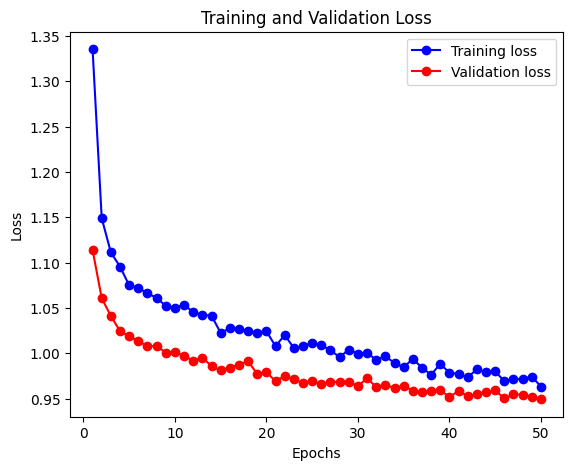

In [32]:
# 훈련 및 검증 손실 그래프
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

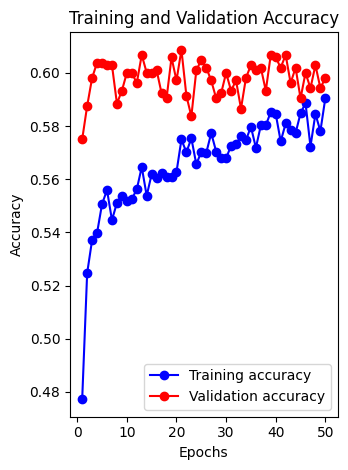

In [33]:
# 훈련 및 검증 정확도 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'bo-', label='Training accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()